In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse

El nostre dataset conté les següents columnes:

1. CRIM      per capita crime rate by town

2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.

3. INDUS     proportion of non-retail business acres per town

4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5. NOX       nitric oxides concentration (parts per 10 million)

6. RM        average number of rooms per dwelling

7. AGE       proportion of owner-occupied units built prior to 1940

8. DIS       weighted distances to five Boston employment centres

9. RAD       index of accessibility to radial highways

10. TAX      full-value property-tax rate per $10,000

11. PTRATIO  pupil-teacher ratio by town

12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13. LSTAT    % lower status of the population

14. MEDV     Median value of owner-occupied homes in $1000's

Se preparán los datos tal como se hizo en M05T02, si se quiere ver el proceso explicado y con gràficos se puede consultar en https://github.com/maribelseara/SkLearn_Train_Test/blob/main/sklear_train_test.ipynb

Lectura de los datos y generación de columnas dummy

In [2]:
columnes=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B', 'LSTAT', 'MEDV']
df=pd.read_csv("housing data.csv", names=columnes)
df=pd.get_dummies(df, columns=['RAD'])
#Se elimina la última columna dummy para evitar multicolinealidad
df=df.drop(['RAD_24'], axis=1)

Estandarización de los datos, en M05T02 ya se comprobó que no eran gaussianos y algunos tenían outilers y otros no, así que se optó por RobustScaler para los atributos con outliers y MaxMinScaler para los que no.

In [3]:
atributs_amb_outliers=['CRIM', 'ZN', 'RM', 'DIS', 'B', 'LSTAT', 'MEDV']
atributs_sense_outliers=['INDUS', 'NOX', 'AGE', 'TAX', 'PTRATIO']
df_estandaritzat=df.copy()
df_estandaritzat[atributs_amb_outliers]=RobustScaler().fit_transform(df_estandaritzat[atributs_amb_outliers])
df_estandaritzat[atributs_sense_outliers]=MinMaxScaler().fit_transform(df_estandaritzat[atributs_sense_outliers])

In [4]:
df_estandaritzat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8
0,-0.069593,1.44,0.067815,0,0.314815,0.496612,0.641607,0.285777,0.208015,0.287234,...,-0.637681,0.351097,True,False,False,False,False,False,False,False
1,-0.063755,0.00,0.242302,0,0.172840,0.287940,0.782698,0.569789,0.104962,0.553191,...,-0.221889,0.050157,False,True,False,False,False,False,False,False
2,-0.063760,0.00,0.242302,0,0.172840,1.323171,0.599382,0.569789,0.104962,0.553191,...,-0.732634,1.692790,False,True,False,False,False,False,False,False
3,-0.062347,0.00,0.063050,0,0.150206,1.069783,0.441813,0.924391,0.066794,0.648936,...,-0.841579,1.529781,False,False,True,False,False,False,False,False
4,-0.052144,0.00,0.063050,0,0.150206,1.271680,0.528321,0.924391,0.066794,0.648936,...,-0.602699,1.880878,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.420455,0,0.386831,0.521003,0.681771,-0.236007,0.164122,0.893617,...,-0.168916,0.150470,True,False,False,False,False,False,False,False
502,-0.058759,0.00,0.420455,0,0.386831,-0.119919,0.760041,-0.297887,0.164122,0.893617,...,-0.227886,-0.075235,True,False,False,False,False,False,False,False
503,-0.054450,0.00,0.420455,0,0.386831,1.039973,0.907312,-0.336744,0.164122,0.893617,...,-0.571714,0.338558,True,False,False,False,False,False,False,False
504,-0.040867,0.00,0.420455,0,0.386831,0.793360,0.889804,-0.265053,0.164122,0.893617,...,-0.487756,0.100313,True,False,False,False,False,False,False,False


### - Exercici 1
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

Mostrarem les correlacions del target (MEDV)

In [5]:
df_estandaritzat.corrwith(df['MEDV'])

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
RAD_1      0.040453
RAD_2      0.104444
RAD_3      0.167352
RAD_4     -0.065711
RAD_5      0.187356
RAD_6     -0.039411
RAD_7      0.092802
RAD_8      0.190053
dtype: float64

Com que totes les variables tenen un minim de correlació amb MEDV , les farem servir totes per no malbaratar informació. Separarem el target a la variable 'y' i partirem les dades en train i test.

In [6]:
X=df_estandaritzat.drop('MEDV', axis=1)
y=df_estandaritzat['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [7]:
model_lineal=LinearRegression().fit(X_train, y_train)

Una vegada entrenat el model mostrem el coeficient de determinació (R), els coeficients b₀ i el b₁.

In [8]:
print("El coeficient de determinació (R) és" ,model_lineal.score(X_train,y_train))
print("El coeficient b₀ és" , model_lineal.intercept_)
print("Els coeficients b₁ són", model_lineal.coef_)

El coeficient de determinació (R) és 0.7539505177975125
El coeficient b₀ és 1.8733111394174975
Els coeficients b₁ són [-0.03990364  0.08912884  0.09508263  0.45479318 -1.07725773  0.29966789
  0.17585645 -0.5597961  -0.60538614 -1.12016843  0.01625572 -0.75516474
 -0.95592404 -0.79123773 -0.43184289 -0.57831302 -0.55031455 -0.6942856
 -0.36326552 -0.52375766]


Fem la predicció amb les dades de test

In [9]:
y_predict_lineal=model_lineal.predict(X_test)

Veiem gràfics de la predicció amb l'atribut més relacionat (LSTAT) i l'atribut no binari menys relacionat (DIS)

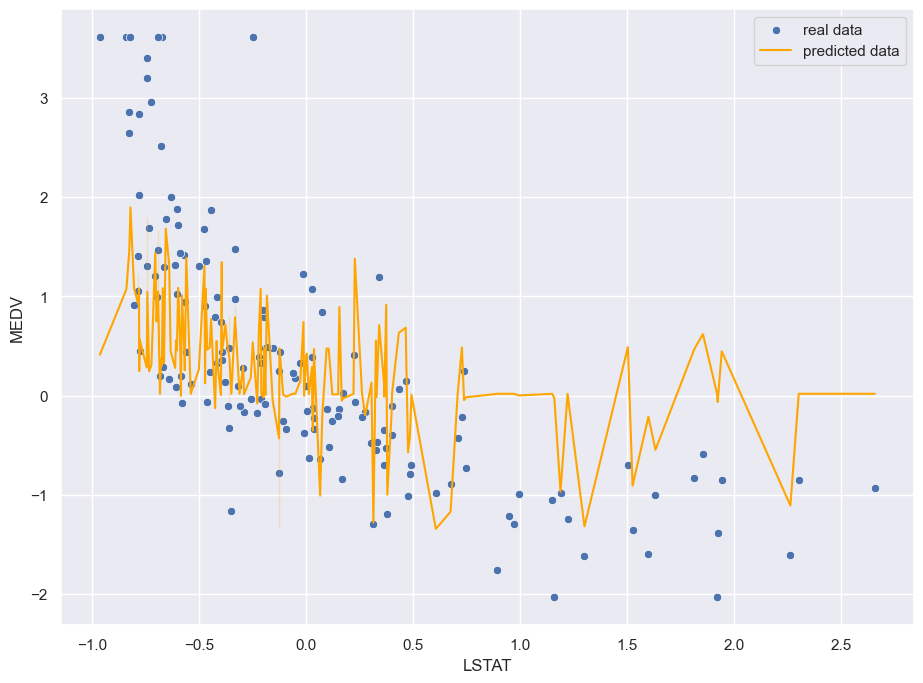

In [62]:
sns.set(rc={'figure.figsize':(11,8)})
ax=sns.scatterplot(x=X_test['LSTAT'], y=y_test, label='real data')
ax1=sns.lineplot(x=X_test['LSTAT'], y=y_predict_lineal, color='orange', label='predicted data')

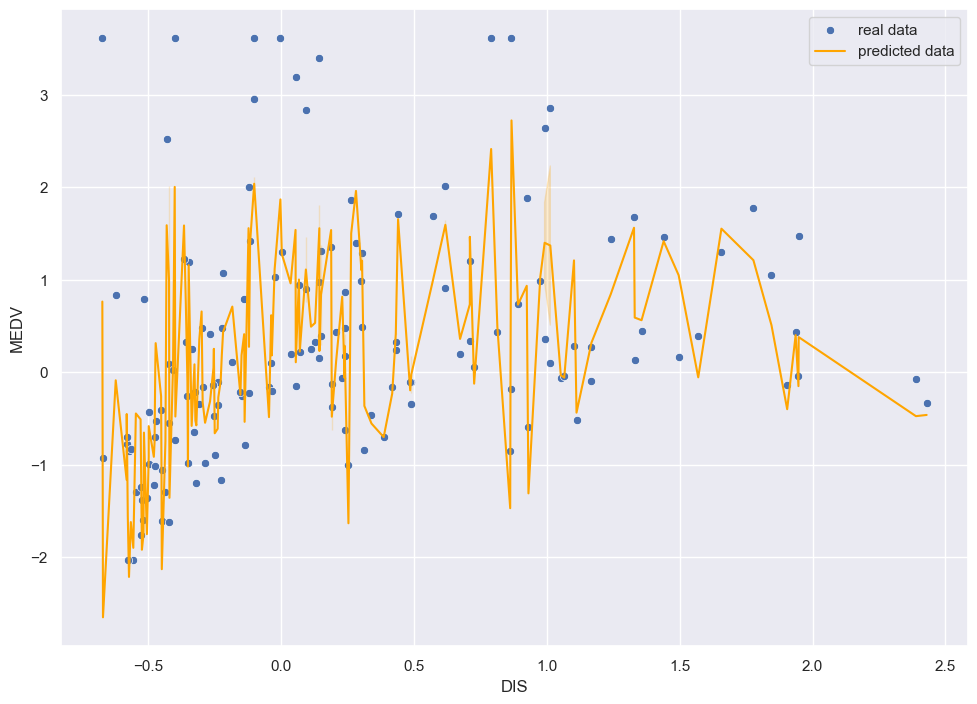

In [11]:
ax=sns.scatterplot(x=X_test['DIS'], y=y_test, label='real data')
ax1=sns.lineplot(x=X_test['DIS'], y=y_predict_lineal, color='orange',label='predicted data')

Sembla que la predicció s'ajusta bastant a la realitat. Fins i tot amb un dels atributs amb menys correlació (DIS), que al rebre informació de les altres variables també queda ajustat.

A continuació provem una regresió polinomial.

In [12]:
trans_X_train = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
model_polinomial=LinearRegression().fit(trans_X_train, y_train)

Amb el model ja entrenat consultarem R, b₀ i b₁


In [13]:
print("El coeficient de determinació (R) és" ,model_polinomial.score(trans_X_train,y_train))
print("El coeficient b₀ és" , model_polinomial.intercept_)
print("Els coeficients b₁ són", model_polinomial.coef_)

El coeficient de determinació (R) és 0.9507794650026756
El coeficient b₀ és 1.9879687294621406
Els coeficients b₁ són [ 2.82595126e+00  5.08366673e-01 -1.19434499e+00  8.08223037e-01
  1.77989911e-02 -7.68257520e-01  6.07729485e+00 -4.73090515e+00
 -2.57170089e+00 -5.53923785e+00  2.40635566e-01 -2.12130051e+00
 -8.77244975e-01  4.74231413e+00 -1.61055362e-01 -4.47882584e-01
 -1.47651307e-01 -1.38299319e-01  1.81505180e+00 -2.80271214e+00
  2.76128645e-03 -4.99907152e+00  4.87844827e+00  1.59256570e-01
 -1.94649639e-01  4.63823644e-02  9.18980841e-02  1.38010633e-01
 -6.76895232e+00  1.39065631e-01 -1.54463672e-03  7.08014074e-02
  1.28249348e+01 -1.13967098e+01  2.76393914e+00 -4.01704203e+00
 -2.72446752e+00  3.08797958e+00  2.58596132e+01  3.98830154e+00
 -5.15117448e-02 -1.71367146e+00  3.69810027e-02 -1.68339294e-01
  6.55947374e-02 -7.45080364e-02 -1.65314918e-01  4.32277124e-01
 -1.37613106e-01  3.98042395e-02  2.05579876e-02 -1.35491130e-01
 -1.04661764e+00 -9.55545702e-02 -1.0

Fem la predicció i la comparem amb els valors reals

In [14]:
X_test_polinomial=PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)
y_predict_polinomial=model_polinomial.predict(X_test_polinomial)

Fem una representació gràfica per veure-ho més clar

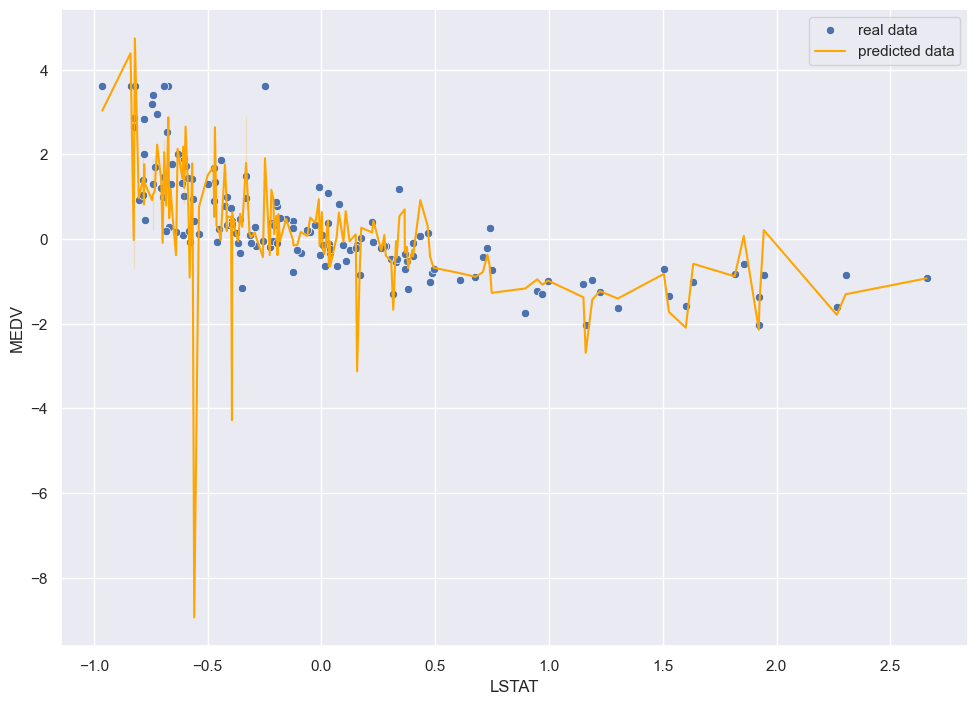

In [15]:
ax=sns.scatterplot(x=X_test['LSTAT'], y=y_test, label='real data')
ax1=sns.lineplot(x=X_test['LSTAT'], y=y_predict_polinomial, color='orange', label='predicted data')

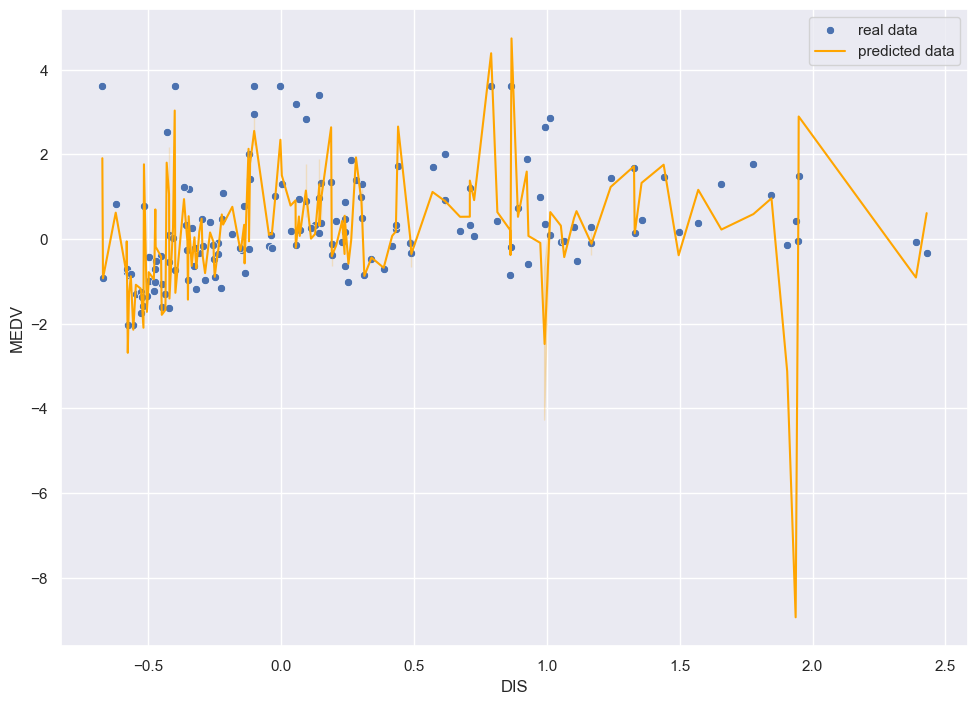

In [16]:
ax=sns.scatterplot(x=X_test['DIS'], y=y_test, label='real data')
ax1=sns.lineplot(x=X_test['DIS'], y=y_predict_polinomial, color='orange', label='predicted data')

En contra del que cabria esperar sembla que la regressió polinomial no s'ajusta tan bé a les dades en alguns punts. Potser perquè alguns outliers la desajusten. Es farà el necessari per ajustar-la més endevant.

Per últim probarem amb una regressió Lasso, que minimitza l'impacte de les variables amb poca correlació i els outliers.

In [17]:
model_lasso=Lasso(alpha=0.1).fit(X_train, y_train)

In [18]:
print("El coeficient de determinació (R) és" ,model_lasso.score(X_train,y_train))
print("El coeficient b₀ és" , model_lasso.intercept_)
print("Els coeficients b₁ són", model_lasso.coef_)

El coeficient de determinació (R) és 0.6266426585752081
El coeficient b₀ és 0.21867806640158183
Els coeficients b₁ són [-0.03663083  0.01895986 -0.          0.         -0.          0.42258004
 -0.         -0.         -0.         -0.          0.02727992 -0.49558823
 -0.          0.          0.         -0.          0.         -0.
  0.          0.        ]


De moment es el que ens ha donat un coeficient de determinació més baix, té lógica, ja que el seu objectiu es evita l'overfitting.
Fem la predicció amb les dades de test

In [19]:
y_predict_lasso=model_lineal.predict(X_test)

Mirem les dades de manera gràfica com hem fet amb els dos models anteriors.

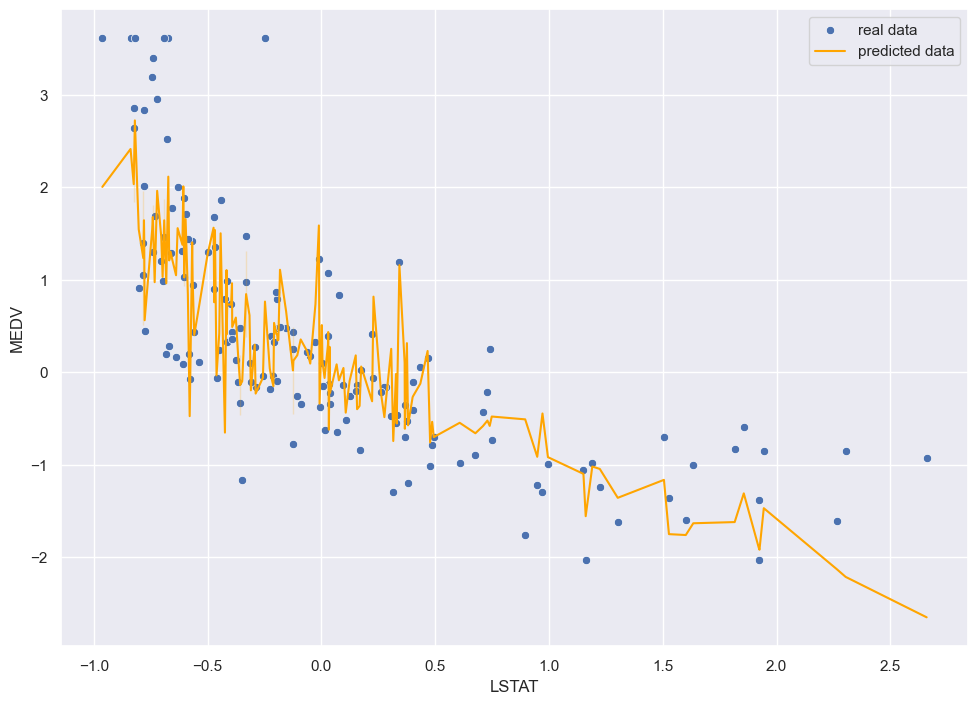

In [20]:
ax=sns.scatterplot(x=X_test['LSTAT'], y=y_test, label='real data')
ax1=sns.lineplot(x=X_test['LSTAT'], y=y_predict_lasso, color='orange', label='predicted data')

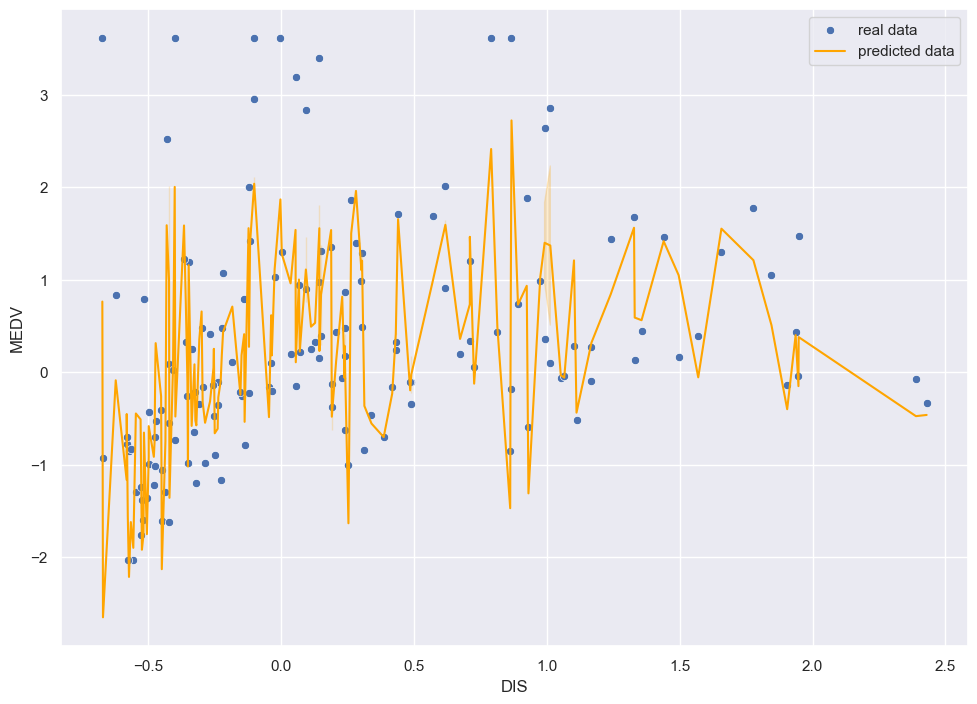

In [21]:
ax=sns.scatterplot(x=X_test['DIS'], y=y_test, label='real data')
ax1=sns.lineplot(x=X_test['DIS'], y=y_predict_lasso, color='orange',label='predicted data')

Sembla un model força coherent, que deixa de banda els outliers, per no apartar-se tan exageradament de la seva trajectoria com els anteriors.

### - Exercici 2
Compara’ls en base al MSE i al R2.

In [23]:
mse_lineal=mse(y_test, y_predict_lineal)
mse_polinomial=mse(y_test, y_predict_polinomial)
mse_lasso=mse(y_test, y_predict_lasso)
print("En el cas de la regressió lineal simple el mean squared error es", mse_lineal)
print("El el cas de la regressió polinomial el mean squared error es", mse_polinomial)
print("El el cas de la regressió Lasso el mean squared error es", mse_lasso)

En el cas de la regressió lineal simple el mean squared error es 0.43595161036106306
El el cas de la regressió polinomial el mean squared error es 1.28036636500751
El el cas de la regressió Lasso el mean squared error es 0.43595161036106306


Com haviem vist als gràfics en aquest cas la regressió polinomial s'ajusta pitjor a les dades en alguns punts i té un mean squared error que gairebé triplica al de la regressió lineal i el model Lasso. Respecte a la regressió Lasso, el seu MSE és idèntic a la regressió lineal. Serà interesant veure com varia quan modifiquem l'alpha i altres paràmetres.

In [24]:
r2_lineal=model_lineal.score(X_train,y_train)
r2_polinomial=model_polinomial.score(trans_X_train,y_train)
r2_lasso=model_lasso.score(X_train, y_train)
print("El coeficient de determinació (R²) a la regressió lineal simple es:", r2_lineal)
print("El coeficient de determinació (R²) a la regressió polinomial es:", r2_polinomial)
print("El coeficient de determinació (R²) a la regressió Lasso es:", r2_lasso)

El coeficient de determinació (R²) a la regressió lineal simple es: 0.7539505177975125
El coeficient de determinació (R²) a la regressió polinomial es: 0.9507794650026756
El coeficient de determinació (R²) a la regressió Lasso es: 0.6266426585752081


Tenint en compte que el coeficient de determinació (R²) va del 0 al 1 on 1 indicaria un ajust perfecte del model a les dades i 0 cap ajust, podem veure que aquest indicador reflexa que la regresió polinomial s'ha ajustat millor a les dades (tot i les excepcions que hem vist). És un ajust tan bo, que posiblement estem davant d'un cas d'overfitting.

Podriem dir que a la regressió polinomial l'ajust es una mica millor que a la lineal, però també té el triple de MSE. Hem d'intentar baixar el MSE de la polinomial per tenir un model ben ajustat sense tant error. D'altra banda hauriem d'intentar pujar el R2 de la regressió lineal per tal que s'ajusti millor. A la regressió Lasso ens cal provar com la modificació de paràmetres pot afectar tant al R2 com al MSE.

### - Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

In [25]:
params={
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

params_lasso={
    'alpha': list(np.arange(0.01, 0.1, 0.01)),
    'fit_intercept': [True, False],
    'precompute' : [True, False],
    'copy_X': [True, False],
    'max_iter': list(np.arange(1000,3000,1000)),
    'tol': list(np.arange(0.0001,0.0003, 0.0001)),
    'warm_start' : [True, False],
    'positive': [True, False],
    'selection' : ['cyclic', 'random']
}
print(params_lasso)

{'alpha': [0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.06999999999999999, 0.08, 0.09], 'fit_intercept': [True, False], 'precompute': [True, False], 'copy_X': [True, False], 'max_iter': [500, 1000, 1500, 2000, 2500], 'tol': [0.0001, 0.0002, 0.00030000000000000003, 0.0004], 'warm_start': [True, False], 'positive': [True, False], 'selection': ['cyclic', 'random']}


Com hem dit al model de regressió lineal intentarem millorar el R2

In [26]:
model_lineal_millorat=LinearRegression()
grid_search_linear=GridSearchCV(estimator=model_lineal_millorat, param_grid=params,scoring='r2')

In [63]:
grid_search_linear.fit(X_train, y_train)
best_params_linear=grid_search_linear.best_params_
print("Els millors paràmetres per al model de regressió lineal són:", best_params_linear)

Els millors paràmetres per al model de regressió lineal són: {'copy_X': True, 'fit_intercept': True, 'positive': False}


In [28]:
r2_best_model_linear=grid_search_linear.best_estimator_.score(X_train, y_train)
print("El R2 del model de Regressió Lineal utilitzat previament era", r2_lineal)
print("El R2 del millor model de Regressió Lineal és", r2_best_model)

El R2 del model de Regressió Lineal utilitzat previament era 0.7539505177975125
El R2 del millor model de Regressió Lineal és 0.7539505177975125


Sembla que per aquest model els paràmetres per defecte ja maximitzaven el coeficient de determinació (R2). 

Intentem millorar el MSE del model de regressió Polinomial

In [29]:
model_polinomial_millorat=LinearRegression()
grid_search_polinomial=GridSearchCV(estimator=model_polinomial_millorat, param_grid=params, scoring='neg_mean_squared_error')

In [30]:
grid_search_polinomial.fit(trans_X_train, y_train)
best_params_polinomial=grid_search_polinomial.best_params_
print("Els millors paràmetres per al model polinomial són", best_params_polinomial)

Els millors paràmetres per al model polinomial són {'copy_X': True, 'fit_intercept': False, 'positive': True}


In [31]:
y_predict_best_polinomial=grid_search_polinomial.best_estimator_.predict(X_test_polinomial)
mse_best_model_polinomial=mse(y_true=y_test, y_pred=y_predict_best_polinomial)
print("El el cas de la regressió polinomial el mean squared error era", mse_polinomial)
print("El el millor model polinomial el mean squared error és", mse_best_model)

El el cas de la regressió polinomial el mean squared error era 1.28036636500751
El el millor model polinomial el mean squared error és 0.3839907242883668


Com podem veure aquí sí que hem reduit el MSE a gairebé una cuarta part del valor inicial ajustant els paràmetres. Comprovem que ha passat amb el R2 en aquest cas.

In [32]:
r2_best_polinomial_model=grid_search_polinomial.best_estimator_.score(trans_X_train, y_train)
print("El R2 del model de Regressió Polinomial utilitzat previament era", r2_polinomial)
print("El R2 del millor model de Regressió Polinomial és", r2_best_polinomial_model)

El R2 del model de Regressió Polinomial utilitzat previament era 0.9507794650026756
El R2 del millor model de Regressió Polinomial és 0.7848278371135389


S'ha reduit considerablement, però continua sent major que a la regressió lineal i ara amb un MSE inferior. Anem a veure de manera gràfica si efectivament els punts on no s'ajustava gens s'han solucionat amb l'ajust de paràmetres.

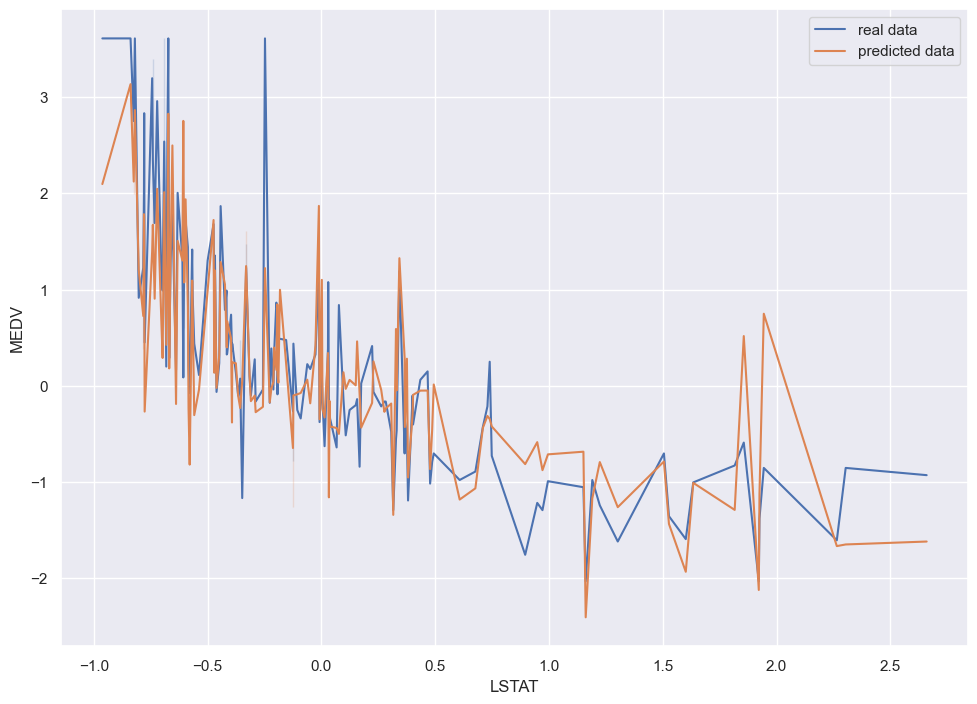

In [33]:
ax=sns.lineplot(x=X_test['LSTAT'], y=y_test, label='real data')
ax1=sns.lineplot(x=X_test['LSTAT'], y=y_predict_best_polinomial, label='predicted data')

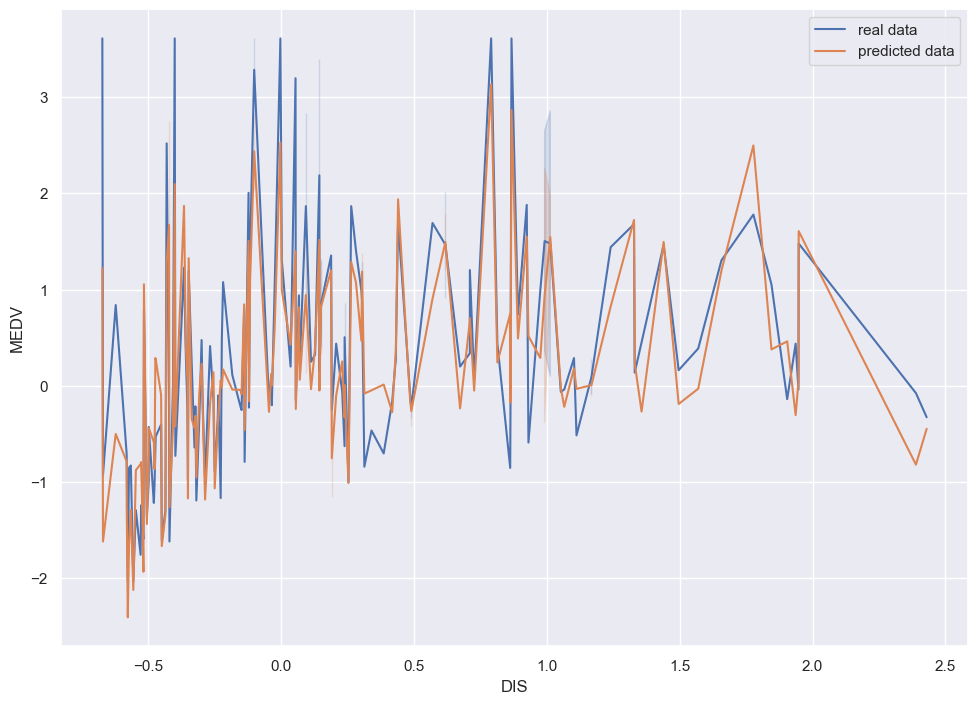

In [34]:
ax=sns.lineplot(x=X_test['DIS'], y=y_test, label='real data')
ax1=sns.lineplot(x=X_test['DIS'], y=y_predict_best_polinomial, label='predicted data')

Efectivament, les línies que marxaven de la gràfica han desaparegut amb l'ajust de paràmetres per a a la correcció del MSE.

Comencem l'optimització del model Lasso per obtenir millor R2, tenint en compte també mantenir baix el MSE.

In [35]:
model_lasso_millorat=Lasso()
grid_search_lasso=GridSearchCV(estimator=model_lasso_millorat, param_grid=params_lasso,scoring=['r2', 'neg_mean_squared_error'], refit='r2')

In [36]:
#¡¡Compte, aquesta cel·la triga molt en executar-se (gairebé 5 mins) perqué he volgut ser exhaustiva amb la quantitat de paràmetres a testar!!
grid_search_lasso.fit(X_train, y_train)
best_params_lasso=grid_search_lasso.best_params_
print("Els millors paràmetres per al model Lasso són:", best_params_lasso)

Els millors paràmetres per al model Lasso són: {'alpha': 0.01, 'copy_X': False, 'fit_intercept': True, 'max_iter': 2500, 'positive': False, 'precompute': True, 'selection': 'random', 'tol': 0.0002, 'warm_start': False}


In [ ]:
y_predict_best_lasso=grid_search_lasso.best_estimator_.predict(X_test)

In [38]:
r2_best_model_lasso=grid_search_lasso.best_estimator_.score(X_train, y_train)
print("El R2 del model de Regressió Lasso utilitzat previament era", r2_lasso)
print("El R2 del millor model de Regressió Lasso és", r2_best_model_lasso)

El R2 del model de Regressió Lasso utilitzat previament era 0.6266426585752081
El R2 del millor model de Regressió Lasso és 0.7306123585092962


Veiem que amb l'ajust de paràmetres l'ajust ha millorat 0.11 punts. Revisem que ha passat amb el MSE

In [37]:

mse_best_model_lasso=mse(y_true=y_test, y_pred=y_predict_best_lasso)
print("El el cas de la regressió polinomial el mean squared error era", mse_lasso)
print("El el millor model lasso el mean squared error és", mse_best_model_lasso)

El el cas de la regressió polinomial el mean squared error era 0.43595161036106306
El el millor model polinomial el mean squared error és 0.4650442792694869


El MSE ha pujat només 0.03 punts, així que sembla que compensa a cambi d'haber millorat el R2

### - Exercici 4
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

Fins ara hem treballat amb aproximació train-test. Anem a veure com funcionarien els models que tenien els millor paràmetres amb cross validation.

In [39]:
model_lineal_cross=LinearRegression(fit_intercept=False, copy_X=True, positive=True).fit(X,y)
scores_linear=cross_val_score(model_lineal_cross, X, y, cv=5, scoring='r2')
scores_linear

array([ 0.5842314 ,  0.7009963 ,  0.54612966, -0.17062669, -0.91176493])

In [40]:
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores_linear.mean(), scores_linear.std()))

0.15 accuracy with a standard deviation of 0.61


Veiem que el rendiment del model lineal ha baixat molt. Anem a veure que passa amb el model polinomial

In [49]:
trans_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
model_polinomial_cross=LinearRegression(copy_X=True, fit_intercept=False, positive=True)
scores_polinomial=cross_val_score(model_polinomial_cross, trans_X, y, cv=5, scoring='r2')
scores_polinomial

array([-0.5893179 ,  0.73808791, -0.02022646,  0.25298583, -0.11684161])

In [50]:
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores_polinomial.mean(), scores_polinomial.std()))

0.0529 accuracy with a standard deviation of 0.4373


Ha empitjorat encara més que el model de regressió lineal. Aixó pot confirmar que els bons resultats de la repartició train-test es devien a overfitting.

In [45]:
model_lasso_cross=Lasso(alpha=0.01, copy_X=False, fit_intercept=True, max_iter=2500, positive=False, precompute=True, selection='random', tol=0.0002, warm_start=False).fit(X,y)
scores_lasso=cross_val_score(model_lasso_cross, X, y, cv=5, scoring='r2')
scores_lasso

array([0.70181874, 0.73635605, 0.5386935 , 0.07287768, 0.01560069])

In [46]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_lasso.mean(), scores_lasso.std()))

0.41 accuracy with a standard deviation of 0.31


Tot i haver sofert descens, el model Lasso és el que millor ha passat la prova de la Cross Validation.

### - Exercici 5
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

In [52]:
without_RM_X=X.drop('RM', axis=1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(without_RM_X, y, test_size=0.3, random_state=101)

Farem servir els models que van obtenir millors paràmetres per a fer la predicció. Comencem per la regressió Lineal

In [54]:
model_lineal=LinearRegression(fit_intercept=False, copy_X=True, positive=True).fit(X_train, y_train)
y_predict_lineal=model_lineal.predict(X_test)


In [56]:
mse_lineal=mse(y_test, y_predict_lineal)
r2_lineal=model_lineal.score(X_train,y_train)
print("En el cas de la regressió lineal simple el mean squared error es", mse_lineal)
print("El coeficient de determinació (R²) a la regressió lineal simple es:", r2_lineal)

En el cas de la regressió lineal simple el mean squared error es 1.1205463902154615
El coeficient de determinació (R²) a la regressió lineal simple es: 0.30712684346230756


És normal que al treure RM que era la segona variable amb més correlació amb MEDV els resultats empitjorin. Anem a veure com es comporta la regressió polinomial

In [58]:
trans_X_train= PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
trans_X_test=PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)
model_polinomial=LinearRegression(copy_X=True, fit_intercept=False, positive=True).fit(trans_X_train, y_train)
y_predict_polinomial=model_polinomial.predict(trans_X_test)

In [59]:
mse_polinomial=mse(y_test, y_predict_polinomial)
r2_polinomial=model_polinomial.score(trans_X_train,y_train)
print("En el cas de la regressió polinomial el mean squared error es", mse_polinomial)
print("El coeficient de determinació (R²) a la regressió polinomial es:", r2_polinomial)

En el cas de la regressió polinomial el mean squared error es 0.9925444391694191
El coeficient de determinació (R²) a la regressió polinomial es: 0.5258835697353899


Una vegada més les prediccions són pitjors i l'error superior al retirar una variable amb molta correlació i deixar altres menys relacionades. Per últim veiem que fa el model Lasso

In [60]:
model_lasso=Lasso(alpha=0.01, copy_X=False, fit_intercept=True, max_iter=2500, positive=False, precompute=True, selection='random', tol=0.0002, warm_start=False).fit(X_train, y_train)
y_predict_lasso=model_lasso.predict(X_test)


In [61]:
mse_lasso=mse(y_test, y_predict_lasso)
r2_lasso=model_lasso.score(X_train,y_train)
print("En el cas de la regressió Lasso el mean squared error es", mse_lasso)
print("El coeficient de determinació (R²) a la regressió Lasso es:", r2_lasso)

En el cas de la regressió Lasso el mean squared error es 0.5888798996600343
El coeficient de determinació (R²) a la regressió Lasso es: 0.6922834318630191


Com el principal avantatge del model Lasso es la capacitat de posar a 0 les dades poc rellevants ha aguantat molt millor la substracció d'una de les variables més relacionades. 